 这是一份用户消费行为的数据分析**报告**  
 数据来源于网上，是用户在一家CD网站上的消费记录

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = ["user_id", "order_dt", "order_products", "order_amount" ]
# sep="\s+"正则匹配，空格分割
df = pd.read_table("CDNOW_master.txt", sep="\s+", names=columns)

- user_id：用户ID
- order_dt：购买日期
- order_products：购买产品数
- order_amount：购买金额

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         69659 non-null  int64  
 1   order_dt        69659 non-null  int64  
 2   order_products  69659 non-null  int64  
 3   order_amount    69659 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [4]:
df.head()

,user_id,order_dt,order_products,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [5]:
df.describe()

,user_id,order_dt,order_products,order_amount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


- 大部分订单只消费了少量产品（均值2.4），有极值的干扰
- 用户的消费金额整体向较大的金额偏移，平均消费36￥，中位数在26￥，有一定极值干扰

In [6]:
# 对时间进行更改
df["order_dt"] = pd.to_datetime(df["order_dt"], format="%Y%m%d")
# 加入月份
df["month"] = df["order_dt"].values.astype("datetime64[M]")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         69659 non-null  int64         
 1   order_dt        69659 non-null  datetime64[ns]
 2   order_products  69659 non-null  int64         
 3   order_amount    69659 non-null  float64       
 4   month           69659 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2)
memory usage: 2.7 MB


## 1. 进行用户消费趋势的分析（按月）
- 每月的消费总金额
- 每月的消费次数（订单数）
- 每月的产品购买量
- 每月的消费人数

In [8]:
# 每月的消费总金额
grouped_month = df.groupby("month")
order_month_amount = grouped_month["order_amount"].sum()
order_month_amount

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
1997-06-01    108395.87
1997-07-01    122078.88
1997-08-01     88367.69
1997-09-01     81948.80
1997-10-01     89780.77
1997-11-01    115448.64
1997-12-01     95577.35
1998-01-01     76756.78
1998-02-01     77096.96
1998-03-01    108970.15
1998-04-01     66231.52
1998-05-01     70989.66
1998-06-01     76109.30
Name: order_amount, dtype: float64

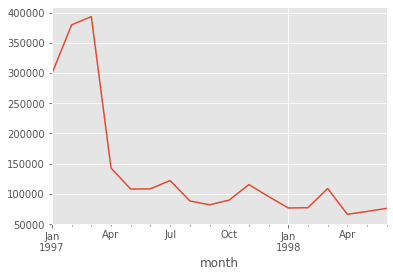

In [9]:
# 可视化绘图
# 可视化显示在页面
%matplotlib inline
# 更改风格
plt.style.use("ggplot")
order_month_amount.plot()

由上图可知，**消费金额**在1997年的前三个月达到最高峰，后续逐渐趋于稳定，有轻微的下降趋势

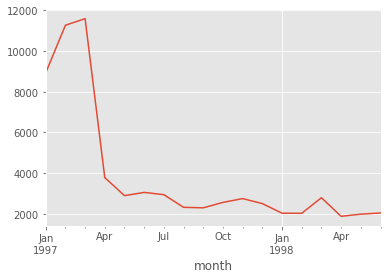

In [10]:
# 每月的消费次数,统计后直接绘图
grouped_month["user_id"].count().plot()

由上图可看出，1997年前三月的**消费订单数**在10000左右，此后逐渐趋于2500左右

In [63]:
# 每月的产品购买量
grouped_month["order_products"].sum().plot()

month
1997-01-01    19416
1997-02-01    24921
1997-03-01    26159
1997-04-01     9729
1997-05-01     7275
1997-06-01     7301
1997-07-01     8131
1997-08-01     5851
1997-09-01     5729
1997-10-01     6203
1997-11-01     7812
1997-12-01     6418
1998-01-01     5278
1998-02-01     5340
1998-03-01     7431
1998-04-01     4697
1998-05-01     4903
1998-06-01     5287
Name: order_products, dtype: int64

由上图可看出1997年前三月的**产品购买量**在25000件左右，后续逐步趋于7000左右

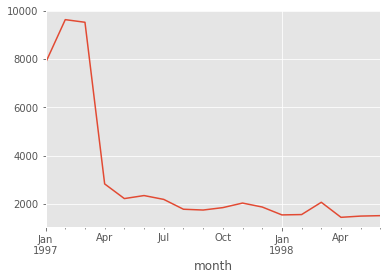

In [12]:
# 每月的消费人数
grouped_month["user_id"].apply(lambda x:x.drop_duplicates().count()).plot()

每月**消费人数**低于每月的**消费次数**，但差异不大  
前三个月每月的消费人数在8000~10000之间，后续月份趋于稳定，均值为2000左右

In [13]:
# 直接使用数据透视
# 以上前三个问题都可以解决
# 但不建议在数据透视表里进行去重操作
df.pivot_table(index="month",
               values=["order_products", "order_amount", "user_id"],
               aggfunc={"order_products":np.sum,
                        "order_amount":np.sum,
                        "user_id":'count'})

,order_amount,order_products,user_id
month,,,
1997-01-01,299060.17,19416,8928
1997-02-01,379590.03,24921,11272
1997-03-01,393155.27,26159,11598
1997-04-01,142824.49,9729,3781
1997-05-01,107933.30,7275,2895
1997-06-01,108395.87,7301,3054
1997-07-01,122078.88,8131,2942
1997-08-01,88367.69,5851,2320
1997-09-01,81948.80,5729,2296


In [14]:
# 每月用户平均消费金额的趋势
# 每月用户平均消费次数的趋势

## 2. 用户个体消费分析
- 用户消费金额、消费次数的描述统计
- 用户消费金额和消费的散点图
- 用户消费金额的分布图
- 用户消费次数的分布图
- 用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额）

In [15]:
grouped_user = df.groupby("user_id")

In [16]:
# 用户消费金额、消费次数的描述统计
grouped_user.sum().describe()

,order_products,order_amount
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


- 用户平均购买了7张CD，但是中位数只有3，说明由小部分用户购买了大量的CD
- 同理，消费金额也是如此，平均消费106，中位数只有43。

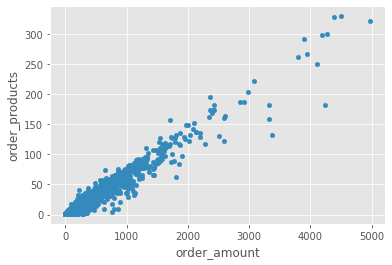

In [17]:
# 用户消费金额和消费的散点图
# 过滤大于6000的数据
grouped_user.sum().query("order_amount<6000").plot.scatter(x="order_amount", y="order_products")

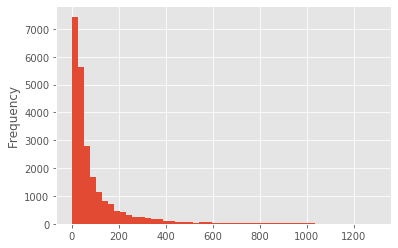

In [18]:
# 用户消费金额的分布图
grouped_user.sum().query("order_amount<1300")["order_amount"].plot.hist("order_amount", bins=50)

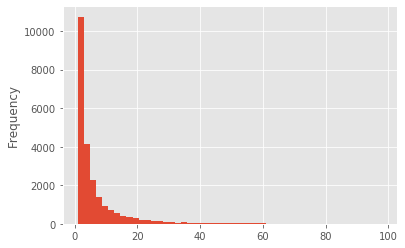

In [19]:
# 用户消费次数的分布图
grouped_user.sum().query("order_products<100")["order_products"].plot.hist("order_products", bins=50)

从直方图可知，用户消费金额和消费次数，绝大部分呈现集中趋势，小部分异常值干扰断，可过滤掉，使用切比雪夫定理，过滤掉均值5个标准差之外的数据 

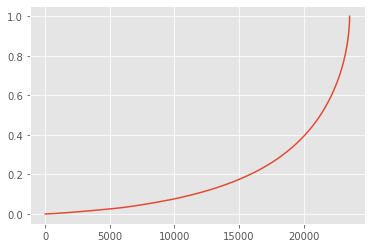

In [20]:
# 用户累计消费金额占比（百分之多少的用户占了百分之多少的消费额）
user_cumsum = grouped_user.sum().sort_values("order_amount").apply(lambda x:x.cumsum()/x.sum())
user_cumsum.reset_index()["order_amount"].plot()

按用户消费金额进行升序排列，一共有23570个用户。  
由上图可知，50%的用户只贡献了15%的消费额度，而排名前3500左右的用户贡献了60%的消费额度

## 3. 用户消费行为
- 用户第一次消费（首购）
- 用户最后一次消费
- 新老客消费比
    - 多少用户仅消费了一次？
    - 每月新客占比？
- 用户分层
    - RFM
    - 新、活跃、回流、流失/不活跃
- 用户购买周期（按订单）
    - 用户消费周期描述
    - 用户消费周期分布
- 用户生命周期（按第一次&最后一次消费）
    - 用户消费周期描述
    - 用户消费周期分布

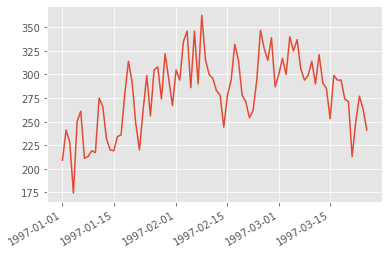

In [21]:
# 用户第一次消费（首购）
grouped_user.min()["order_dt"].value_counts().plot()

用户第一次购买分布，集中在前三个月  
其中，在2月中下旬有一次强烈的波动

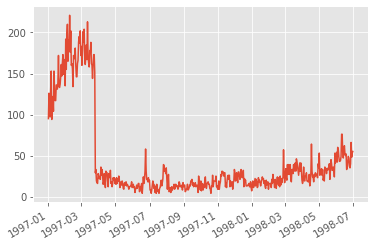

In [22]:
# 用户最后一次消费
grouped_user.max()["order_dt"].value_counts().plot()

用户最后一次购买的分布比第一次分布广  
大部分最后一次购买，集中在前三个月，说明有很多用户购买了一次后就不再进行购买了  
随着时间的递增，最后一次购买数也在递增，消费呈流失上升的状况

In [23]:
# 新老客消费比
# 多少用户仅消费了一次？
# 用户生命周期：
user_life = grouped_user["order_dt"].agg(['min', 'max'])
# 当min=max时，说明用户只消费了一次
(user_life['min'] == user_life['max']).value_counts()


True     12054
False    11516
dtype: int64

有一半左右的用户，只消费了一次

In [24]:
# 新老客消费比
# 每月新客占比？

In [25]:
# 用户分层
# RFM
# 重点内容！！！
# 数据透视表
rfm = df.pivot_table(index="user_id",
                     values=["order_products", "order_amount", "order_dt"],
                     aggfunc={"order_dt":'max',
                              "order_amount":'sum',
                              "order_products":'sum'
                              })
rfm.head()

,order_amount,order_dt,order_products
user_id,,,
1,11.77,1997-01-01,1
2,89.00,1997-01-12,6
3,156.46,1998-05-28,16
4,100.50,1997-12-12,7
5,385.61,1998-01-03,29


In [26]:
# 设置RFM
# 注意"R"不能用正的
rfm["R"] = (rfm["order_dt"] - rfm["order_dt"].max())/np.timedelta64(1, "D")
rfm.rename(columns={'order_products':"F", "order_amount":"M"}, inplace=True)
rfm

,M,order_dt,F,R
user_id,,,,
1,11.77,1997-01-01,1,-545.0
2,89.00,1997-01-12,6,-534.0
3,156.46,1998-05-28,16,-33.0
4,100.50,1997-12-12,7,-200.0
5,385.61,1998-01-03,29,-178.0
...,...,...,...,...
23566,36.00,1997-03-25,2,-462.0
23567,20.97,1997-03-25,1,-462.0
23568,121.70,1997-04-22,6,-434.0


In [27]:
# 对用户进行RFM判断
def rfm_func(x):
    level=x.apply(lambda x:'1' if x >= 0 else '0')
    label = level["R"] + level["F"] + level["M"]
    d = {
        '111':"重要价值客户",
        '011':"重要保持客户",
        '101':"重要发展客户",
        '001':"重要挽留客户",
        '110':"一般价值客户",
        '010':"一般保持客户",
        '100':"一般发展客户",
        '000':"一般挽留客户"
    }
    result = d[label]
    return result

rfm["label"] = rfm[["R", "F", "M"]].apply(lambda x:x-x.mean()).apply(rfm_func, axis=1)


In [28]:
# 将负值变为正值，方便可视化
rfm["R"] = abs(rfm["R"])

In [29]:
rfm.groupby("label").count()

,M,order_dt,F,R
label,,,,
一般价值客户,206,206,206,206
一般保持客户,77,77,77,77
一般发展客户,3300,3300,3300,3300
一般挽留客户,14074,14074,14074,14074
重要价值客户,4554,4554,4554,4554
重要保持客户,787,787,787,787
重要发展客户,331,331,331,331
重要挽留客户,241,241,241,241


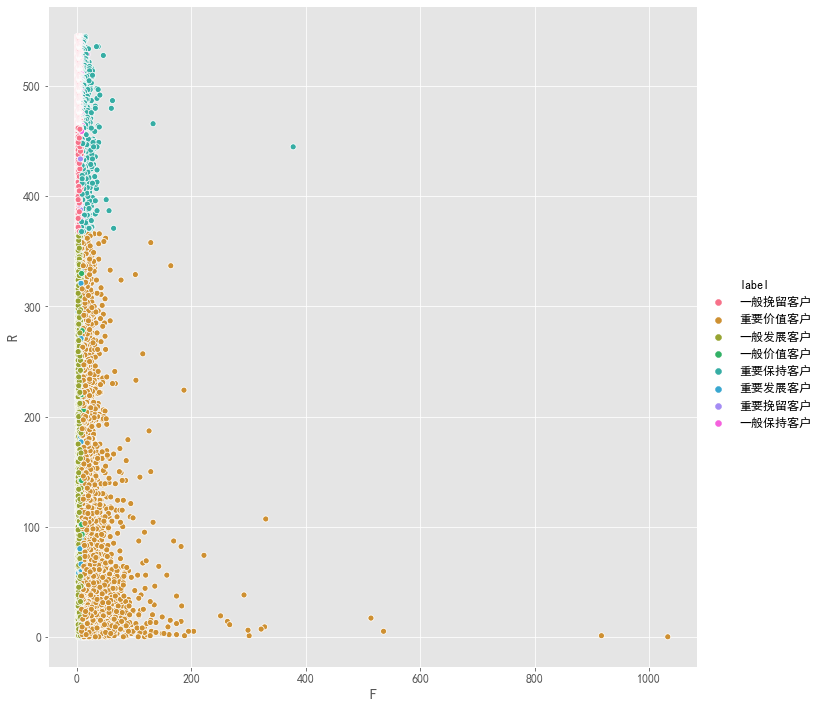

In [30]:
# RFM可视化
plt.style.use("peizhi")
sns.relplot("F", "R", data=rfm, hue="label", height=10, aspect=1)

从RFM分层可知，主要的消费能力还得是 重要价值客户，符合实际

- 尽量用小部分的用户覆盖大部分的额度
- 不要为了数据好看而划分等级

In [31]:
# 用户分层
# 新、活跃、回流、流失
# 数据透视
pivoted_counts = df.pivot_table(index="user_id", 
                                columns="month", 
                                values="order_dt",
                                aggfunc='count').fillna(0)
pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# 数据简化,将一个月内多次记录的数据简化为1
df_purchase = pivoted_counts.applymap(lambda x: 1 if x>0 else 0)
df_purchase

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
def active_status(data):
    status = []
    for i in range(18):
        
        # 若本月没有消费！
        if data[i] == 0:
            # 判断以前是否有记录
            if len(status) > 0:
                # 判断上月是否有记录
                if status[i-1] == "unreg":
                    status.append("unreg")
                else:
                    status.append("unactive")
            else:
                status.append('unreg')
            
        # 若本月消费了！
        else:
            # 判断以前是否有记录
            if len(status) == 0:
                status.append("new")
            else:
                if status[i-1] == "unactive":
                    status.append('return')
                elif status[i-1] == "unreg":
                    status.append('new')
                else:
                    status.append("active")
    return status

#### 若本月没有消费  
- 若之前是未注册，则依旧为未注册
- 若之前有消费，则为流失/不活跃
- 其他情况，为未注册

#### 若本月有消费
- 若是第一次消费，则为新用户
- 如果之前有过消费
    - 若上个月为不活跃，则为回流
    - 若上个月为未注册，则为新用户
    - 其他，为活跃用户

In [61]:
# 可得到一张不同用户在不同月份的不同状态（new=新、active=活跃、return=回流、unactive=流失）
indexs=df['month'].sort_values().astype('str').unique()
purchase_stats=df_purchase.apply(lambda x:pd.Series(active_status(x), index=indexs), axis=1)

In [62]:
purchase_stats

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23567,unreg,unreg,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
23568,unreg,unreg,new,active,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive


In [36]:
# 替换nan后计数
purchase_stats_ct = purchase_stats.replace('unreg', np.NaN).apply(lambda x:pd.value_counts(x))

In [37]:
purchase_stats_ct

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
active,NaN,1157.0,1681,1773.0,852.0,747.0,746.0,604.0,528.0,532.0,624.0,632.0,512.0,472.0,571.0,518.0,459.0,446.0
new,7846.0,8476.0,7248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
return,NaN,NaN,595,1049.0,1362.0,1592.0,1434.0,1168.0,1211.0,1307.0,1404.0,1232.0,1025.0,1079.0,1489.0,919.0,1029.0,1060.0
unactive,NaN,6689.0,14046,20748.0,21356.0,21231.0,21390.0,21798.0,21831.0,21731.0,21542.0,21706.0,22033.0,22019.0,21510.0,22133.0,22082.0,22064.0


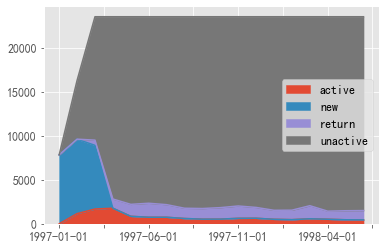

In [38]:
# 可视化
purchase_stats_ct.fillna(0).T.plot.area()

In [65]:
# 消费用户构成
purchase_stats_ct.fillna(0).T.apply(lambda x: x/x.sum(), axis=1)

,active,new,return,unactive
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220
1997-10-01,0.022571,0.000000,0.055452,0.921977


- 新客用户：仅在前三个月，后续再无新增客户。
- 活跃用户：比例持续下降，说明持续消费的用户数量在减少，也说明运营部门的促活效果并不好。
- 回流用户：比例也稍有下降。
- 不活跃用户：比例稍有上升，流失较大。

In [40]:
# 用户购买周期（按订单）
# 用户消费周期描述
# 用户消费周期分布

In [41]:
order_diff = grouped_user.apply(lambda x:x["order_dt"] - x["order_dt"].shift())
order_diff.head(10)

user_id   
1        0        NaT
2        1        NaT
         2     0 days
3        3        NaT
         4    87 days
         5     3 days
         6   227 days
         7    10 days
         8   184 days
4        9        NaT
Name: order_dt, dtype: timedelta64[ns]

In [42]:
order_diff.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: order_dt, dtype: object

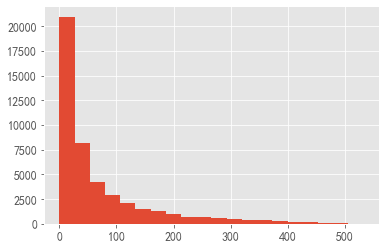

In [43]:
(order_diff / np.timedelta64(1, "D")).hist(bins=20)

- 订单周期呈指数分布
- 用户的平均购买周期椒68天
- 绝大部分的用户的购买周期都低于100天

In [44]:
# 用户生命周期（按第一次&最后一次消费）
# 用户消费周期描述
# 用户消费周期分布

In [45]:
# 前面已求过用户生命周期，这里直接使用
(user_life['max'] - user_life['min']).describe()

count                       23570
mean     134 days 20:55:36.987696
std      180 days 13:46:43.039788
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:00
75%             294 days 00:00:00
max             544 days 00:00:00
dtype: object

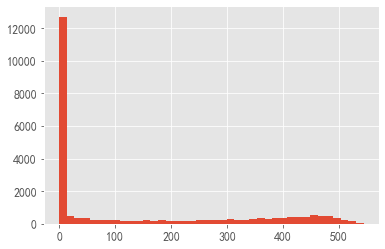

In [46]:
((user_life['max'] - user_life['min'])/np.timedelta64(1, "D")).hist(bins=40)

- 用户的生命周期受只购买一次的用户影响比较厉害（可以排除）
- 用户均消费天数为**134天**，但中位数仅**0天**

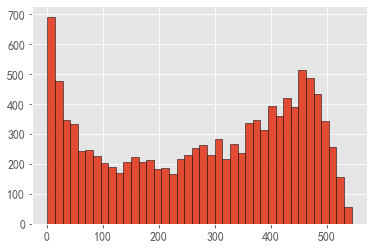

In [47]:
# 排除掉只购买一次的用户后
u_1 = (user_life['max'] - user_life['min'])/np.timedelta64(1, "D")
u_1[u_1.values > 0].hist(bins=40, edgecolor="k")

- 上图可见，用户生命周期呈现双峰趋势，20天内生命周期的用户是一个高峰，400至500天内生命周期的用户是另一个高峰。
- 根据此情况，应该在20天内对客户进行引导，促进其再次消费并形成消费习惯，延长其生命周期；在100至400天的用户，也要根据其特点推出有针对性的营销活动，引导其持续消费。

## 4. 复购率和回购率分析
- 复购率
    - 自然月内，购买多次的用户占比
- 回购率
    - 曾经购买过的用户再某一时期内的在此购买的占比

In [48]:
pivoted_counts

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23568,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# 每月消费一次的是0，消费多次的是1，不消费的是nan
purchase_r = pivoted_counts.applymap(lambda x: 1 if x>1 else np.NaN if x==0 else 0)
purchase_r.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


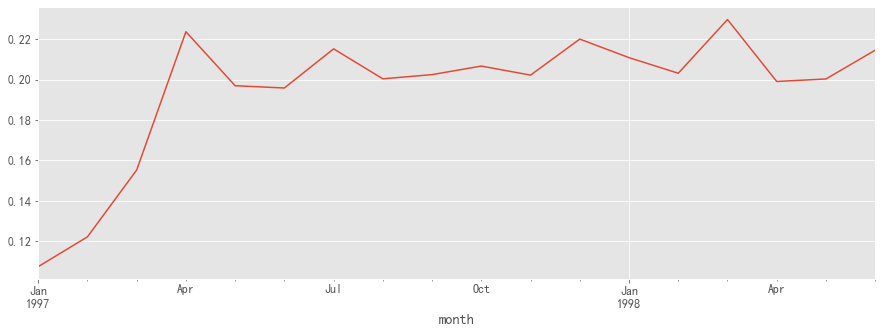

In [50]:
# 复购率图
(purchase_r.sum()/purchase_r.count()).plot(figsize=(15, 5))

- 复购率稳定在20%左右，前三个月有大量用户涌入，而这批用户很多都只购买一次，导致复购率较低

In [51]:
df_purchase.head()

month,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [52]:
# 如果本月进行消费，下月也进行消费，则记为1；
# 如果下月没有消费，则记为0，若本月没有记为消费，则记为nan
indexs = df['month'].sort_values().astype('str').unique()
def purchase_back(data):
    status = []
    for i in range(17):
        if data[i] == 1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return pd.Series(status, index=indexs)

In [53]:
purchase_b = df_purchase.apply(purchase_back, axis=1)

In [54]:
purchase_b.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
user_id,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


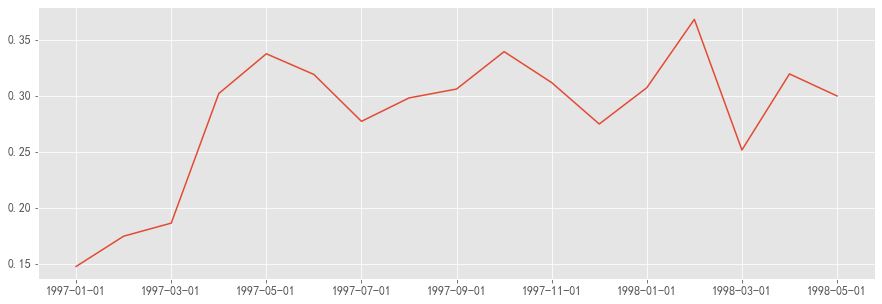

In [55]:
# 回购率图
(purchase_b.sum()/purchase_b.count()).plot(figsize=(15, 5))

- 上图可以看出，在初期用户的回购率并不高，1月的回购率只有15%左右，4月份起回购率稳定在30%左右。
- 从每月有回购消费的用户数数据可以看出，回购用户数整体有下降趋势。
- 对回购率的分析，再次说明了对于新用户，在其第一次消费后的三个月内是一段重要的时期，需要营销策略积极引导其再次消费及持续消费。
- 另外，对于有持续消费的老客，也要适时推出反馈老客户的优惠活动，以加强老客的忠诚度。